In [1]:
import pickle 

with open("pwkrr_cluster_cv_results.pkl", "rb") as fp:
    data = pickle.load(fp)

Mann-Whitney U Test Single vs. Multi-stage performance
PWKRR models
Metric val_spearman, P-value: 0.09293836618293788
Metric val_pearson, P-value: 0.012874040410554032
Metric val_rmse, P-value: 0.03783078607194352


/var/folders/_l/w25c6nhd63lc4pyt5zvn8h640000gn/T/ipykernel_62730/2221147418.py:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(plt_data, x="cluster fold", y="value", hue="stage", ax=axs[jx], palette=cmap)
/var/folders/_l/w25c6nhd63lc4pyt5zvn8h640000gn/T/ipykernel_62730/2221147418.py:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(plt_data, x="cluster fold", y="value", hue="stage", ax=axs[jx], palette=cmap)
/var/folders/_l/w25c6nhd63lc4pyt5zvn8h640000gn/T/ipykernel_62730/2221147418.py:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(plt_data, x="cluster fold", y="value", hue="stage", ax=axs[jx], palette=cmap)


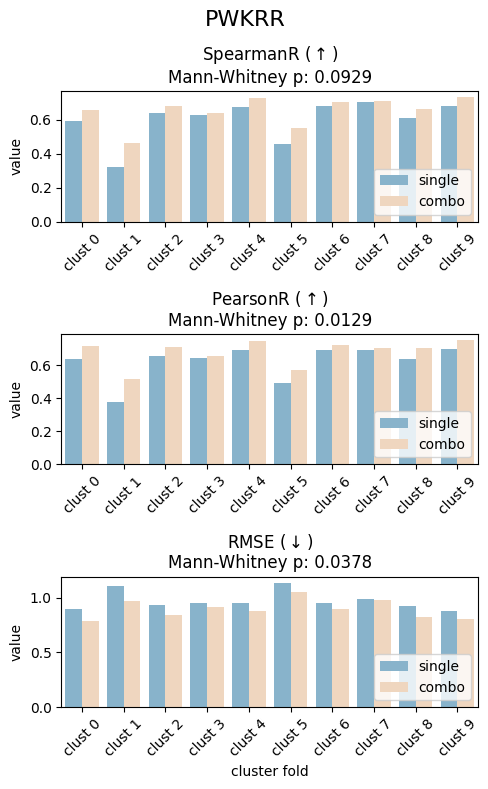

In [2]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

colors = [ "#7DB6D6","#F7D6B7", "#A9D9F2", "#337CA7"] #"#9BCDE9", 
cmap = colors 

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5,8))
print("Mann-Whitney U Test Single vs. Multi-stage performance\nPWKRR models")
pretty_metrics = {"val_spearman": r"SpearmanR ($\uparrow$)", "val_pearson": r"PearsonR ($\uparrow$)", "val_rmse": r"RMSE ($\downarrow$)"}
for jx, metric in enumerate(["val_spearman", "val_pearson", "val_rmse"]):
    metrics_single = [data[f"cluster_fold_{j}_single"][metric] for j in range(10)]
    metrics_multi = [data[f"cluster_fold_{j}_multi"][metric] for j in range(10)]
    plt_data = pd.DataFrame({"value": metrics_single+metrics_multi, "cluster fold": [f"cluster_fold_{j}" for j in range(10)] + [f"cluster_fold_{j}" for j in range(10)], "stage": ["single"]*10 + ["combo"]*10})
    sns.barplot(plt_data, x="cluster fold", y="value", hue="stage", ax=axs[jx], palette=cmap)
    
    axs[jx].set_xticks(range(10), [f"clust {j}" for j in range(10)], rotation=45)
    axs[jx].legend(loc="lower right")
    if metric in ["val_spearman", "val_pearson"]:
        u_stat, p_val = mannwhitneyu(metrics_multi, metrics_single, alternative="greater")
    else:
        u_stat, p_val = mannwhitneyu(metrics_single, metrics_multi, alternative="greater")

    axs[jx].set_title(pretty_metrics[metric] + f"\nMann-Whitney p: {round(p_val, 4)}")
    if jx < 2:
        axs[jx].set_xlabel("")
    print(f"Metric {metric}, P-value: {p_val}") 

plt.suptitle("PWKRR", fontsize=16)
plt.tight_layout()
plt.savefig("pwkrr_cluster_cv_results.jpg", dpi=300)
plt.show()

Mann-Whitney U Test Single vs. Multi-stage performance
PWKRR models
Mann-Whitney U Test Single vs. Multi-stage performance
DeepDTA models
Metric spearmanr, P-value: 0.07023252407917747
Metric pearsonr, P-value: 0.06061225150645831
Metric rmse, P-value: 0.022577284812139504


/var/folders/_l/w25c6nhd63lc4pyt5zvn8h640000gn/T/ipykernel_62730/2880797552.py:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(plt_data, x="cluster fold", y="value", hue="stage", ax=axs[jx], palette=cmap)
/var/folders/_l/w25c6nhd63lc4pyt5zvn8h640000gn/T/ipykernel_62730/2880797552.py:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(plt_data, x="cluster fold", y="value", hue="stage", ax=axs[jx], palette=cmap)
/var/folders/_l/w25c6nhd63lc4pyt5zvn8h640000gn/T/ipykernel_62730/2880797552.py:16: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(plt_data, x="cluster fold", y="value", hue="stage", ax=axs[jx], palette=cmap)


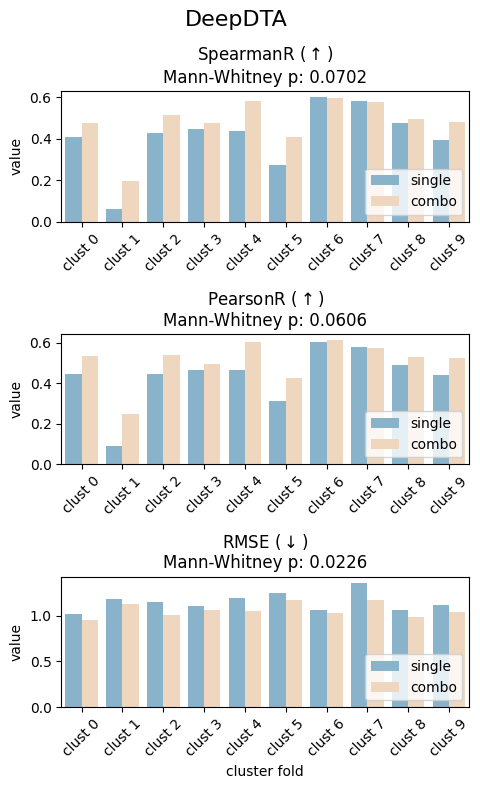

In [3]:
with open("deepdta_single_vs_multi_cluster_cv.pkl", "rb") as fp:
    results = pickle.load(fp)

colors = [ "#7DB6D6","#F7D6B7", "#A9D9F2", "#337CA7"] #"#9BCDE9", 
cmap = colors 

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5,8))
print("Mann-Whitney U Test Single vs. Multi-stage performance\nPWKRR models")
pretty_metrics = {"spearmanr": r"SpearmanR ($\uparrow$)", "pearsonr": r"PearsonR ($\uparrow$)", "rmse": r"RMSE ($\downarrow$)"}

print("Mann-Whitney U Test Single vs. Multi-stage performance\nDeepDTA models")
for jx, metric in enumerate(["spearmanr", "pearsonr", "rmse"]):
    metrics_single = [results[f"single_stage_clust_{j}"][metric] for j in range(10)]
    metrics_multi = [results[f"multi_stage_clust_{j}"][metric] for j in range(10)]
    plt_data = pd.DataFrame({"value": metrics_single+metrics_multi, "cluster fold": [f"cluster_fold_{j}" for j in range(10)] + [f"cluster_fold_{j}" for j in range(10)], "stage": ["single"]*10 + ["combo"]*10})
    sns.barplot(plt_data, x="cluster fold", y="value", hue="stage", ax=axs[jx], palette=cmap)
    axs[jx].set_xticks(range(10), [f"clust {j}" for j in range(10)], rotation=45)
    axs[jx].legend(loc="lower right")
    if metric in ["spearmanr", "pearsonr"]:
        u_stat, p_val = mannwhitneyu(metrics_multi, metrics_single, alternative="greater")
    else:
        u_stat, p_val = mannwhitneyu(metrics_single, metrics_multi, alternative="greater")
    axs[jx].set_title(pretty_metrics[metric] + f"\nMann-Whitney p: {round(p_val, 4)}")
    if jx < 2:
        axs[jx].set_xlabel("")
    print(f"Metric {metric}, P-value: {p_val}") 

plt.suptitle("DeepDTA", fontsize=16)
plt.tight_layout()
plt.savefig("deepdta_cluster_cv_results.jpg", dpi=300)
plt.show()